# **University Admission Prediction Using Multiple Linear Regression**

### **1. IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **2. IMPORT DATASET**

In [2]:
# read the csv file 
df = pd.read_csv('Admission_Predict.csv')

In [3]:
# seeing head of the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# columns present in dataset
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [5]:
# Let's drop the serial no.
df = df.drop('Serial No.',axis=1)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### **3. PERFORM EXPLORATORY DATA ANALYSIS**

In [7]:
# checking the null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
# Statistical summary of the dataframe
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Grouping by University ranking 
df.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### **4 .DATA VISUALIZATION**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f607aacb198>,
      dtype=object)

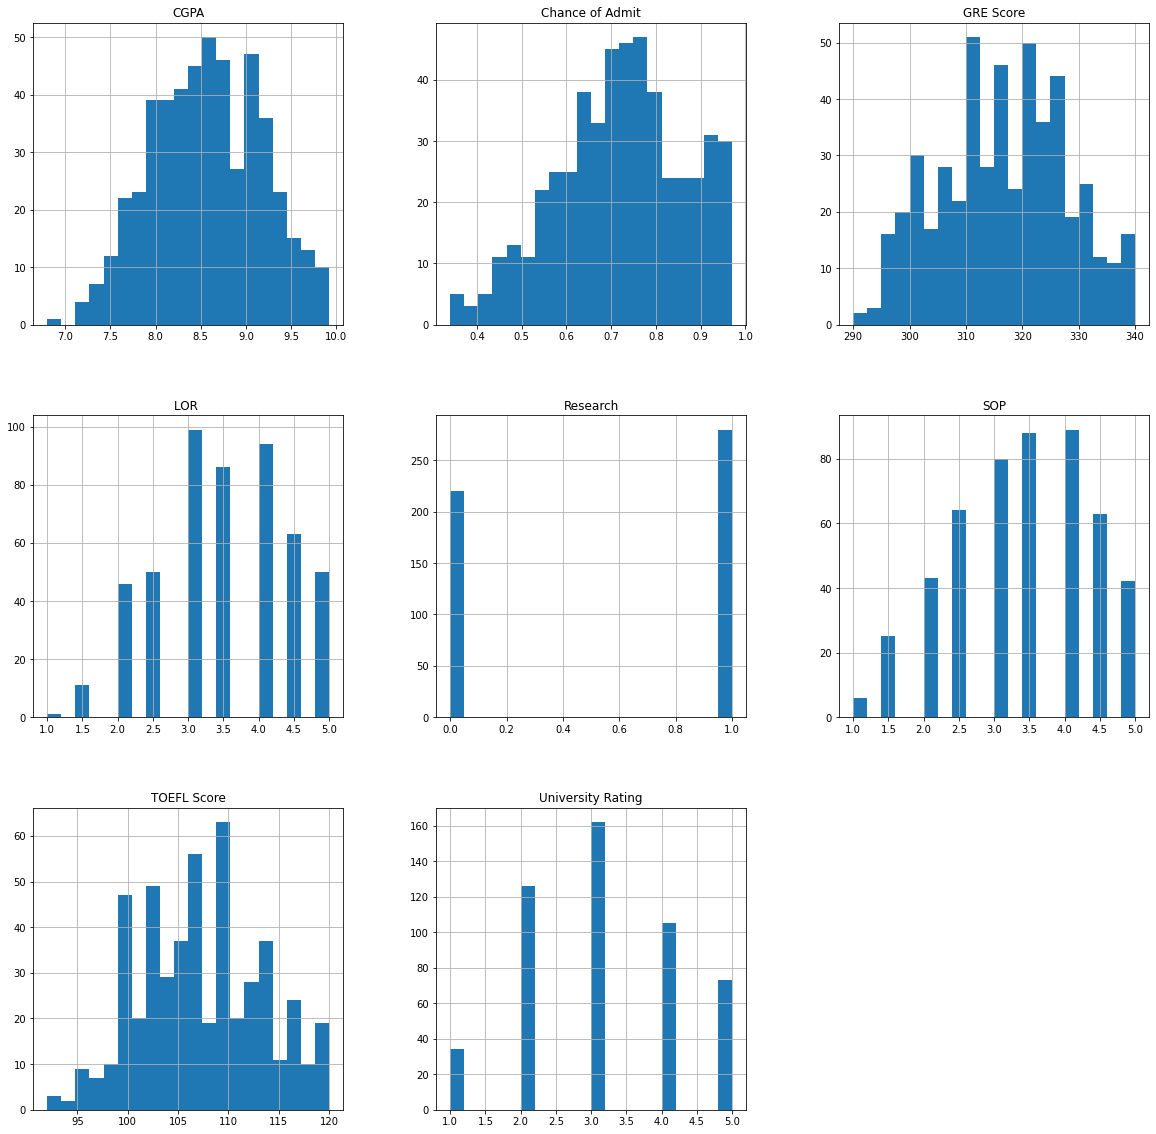

In [11]:
df.hist(bins=20,figsize=(20,20))

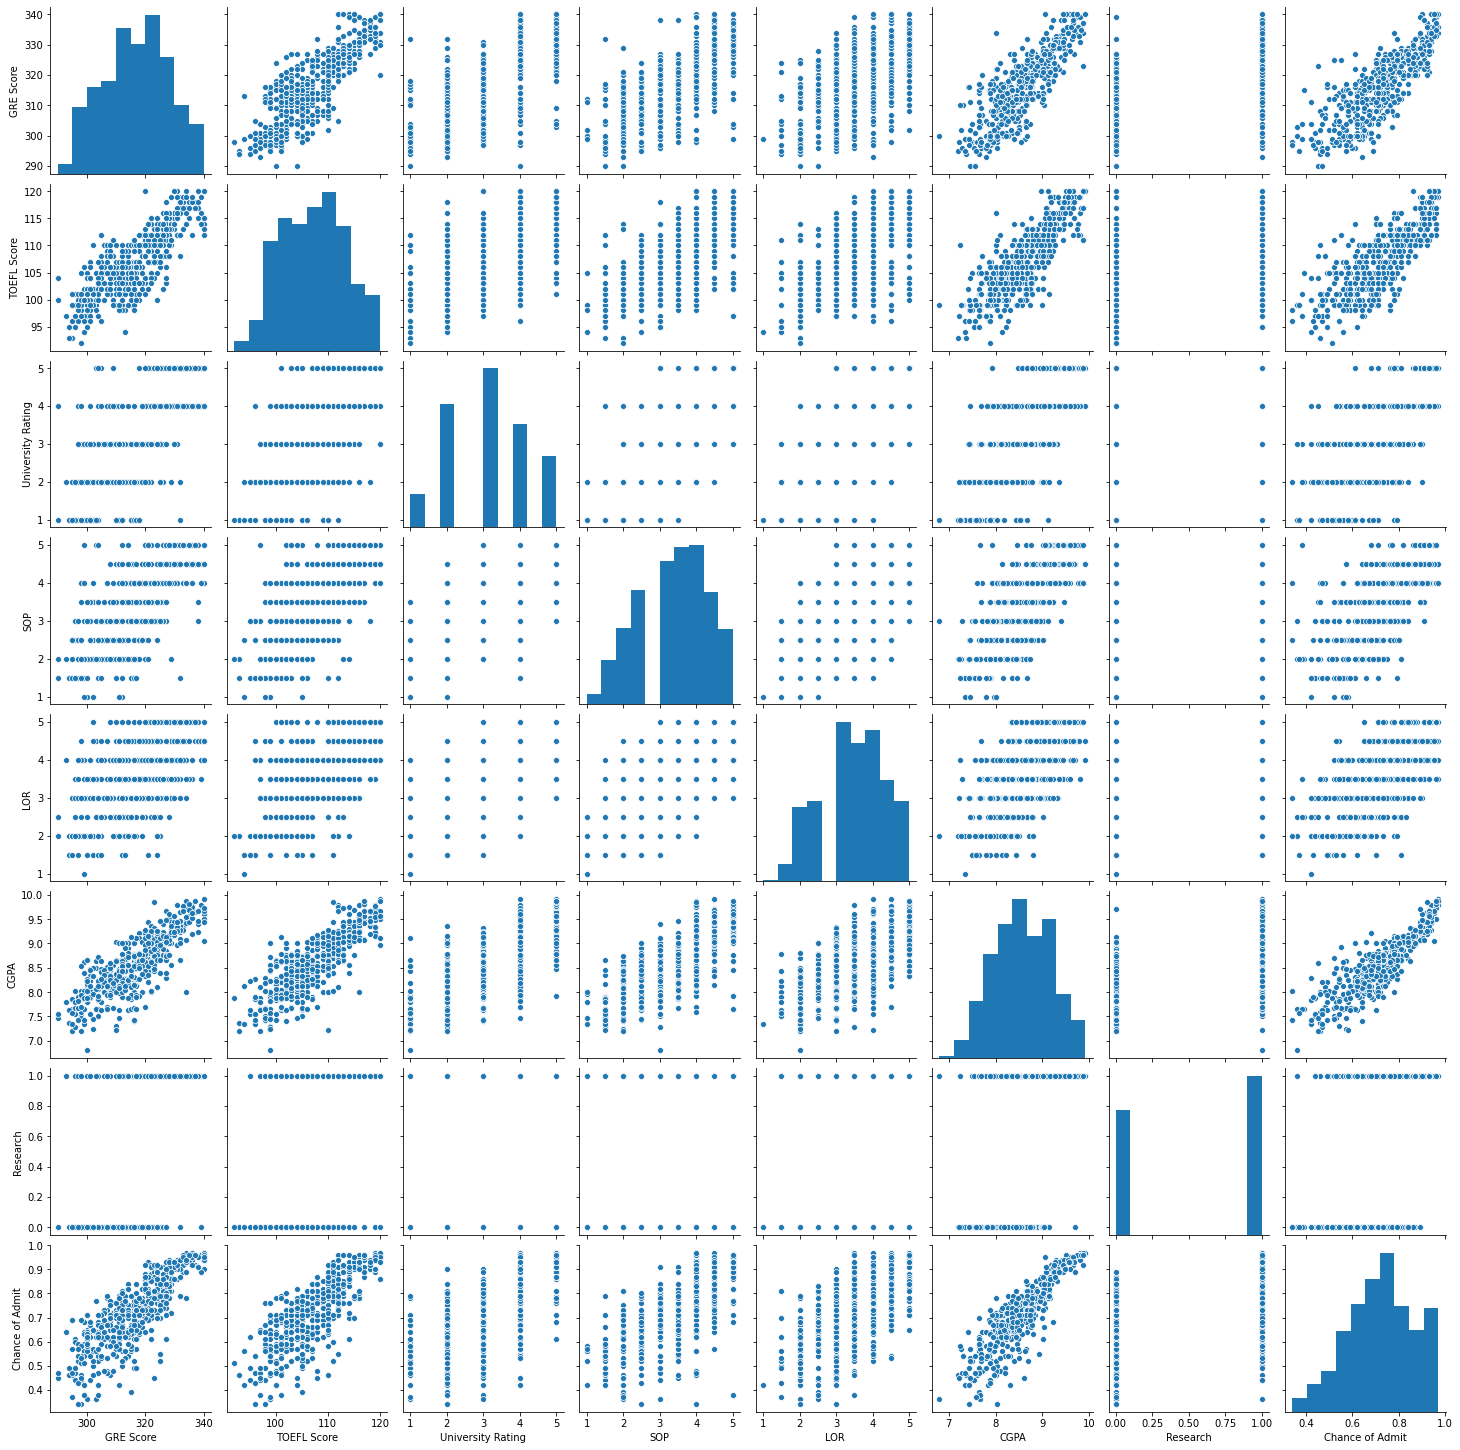

In [12]:
sns.pairplot(df)

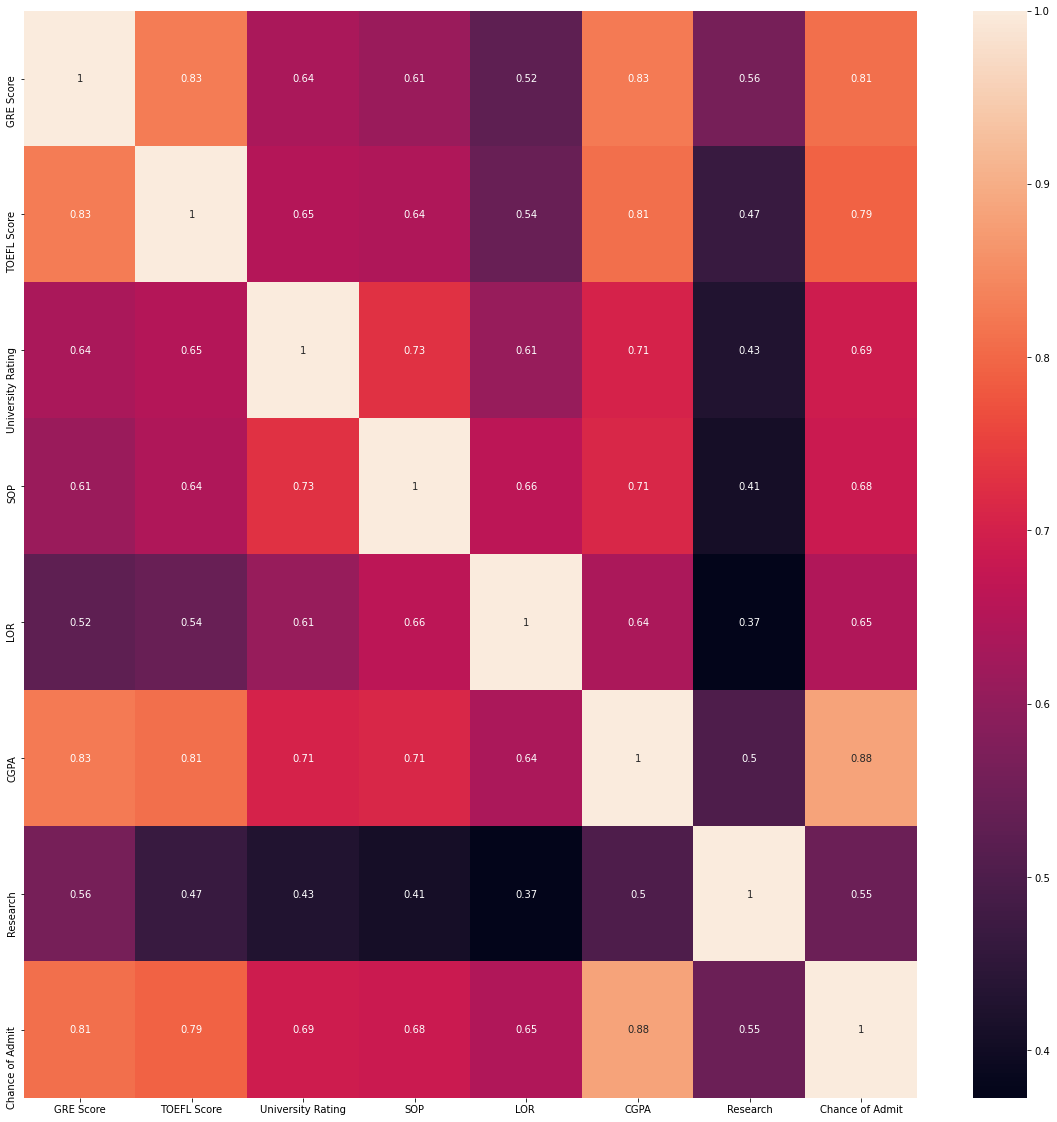

In [13]:
df_corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True)

### **5. CREATE TRAINING AND TESTING DATASET**

In [14]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
X = df.drop(columns = ['Chance of Admit'])

In [16]:
y = df['Chance of Admit']

In [17]:
X.shape

(500, 7)

In [18]:
y.shape

(500,)

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
y = y.reshape(-1,1)
y.shape

(500, 1)

##### **1. DATA PREPROCESSING - SCALING DATA**

In [21]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

##### **2. TRAIN AND TEST SPLIT**

In [22]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

### **6. LINEAR REGRESSION MODEL**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.score(X_test,y_test)

0.7631840156233375

### **7. NEURAL NETWORK MODEL**

![image.png](attachment:image.png)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

##### **1. CREATING AND COMPILING NEURAL NETWORK MODEL**

In [27]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [28]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

##### **2. TRAINING AND EVALUATING NEURAL NETWORK MODEL**

In [29]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 10ms/step - loss: 0.6214 - val_loss: 0.3318
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3608 - val_loss: 0.2634
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2898 - val_loss: 0.2396
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2843 - val_loss: 0.2400
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2615 - val_loss: 0.2454
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2602 - val_loss: 0.2771
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2551 - val_loss: 0.2282
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2312 - val_loss: 0.2309
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2323 - val_loss: 0.2309
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2391 - val_loss: 0.2172
Epoch 11

In [30]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.2765
Accuracy : 0.7234872579574585


In [31]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

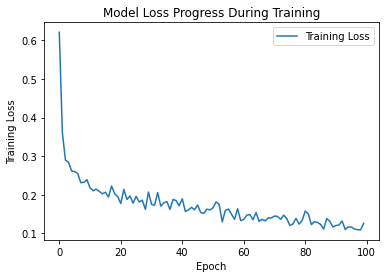

In [32]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

### **8. DECISION TREE MODEL**

In [33]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
dtr.score(X_test,y_test)

0.6710236568731998

### **9. RANDOM FOREST MODEL**

In [35]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=10)
rfr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
rfr.score(X_test,y_test)

0.7580896111022352

**------------------------------------------------------------------------OPTIONAL------------------------------------------------------------------------**

### **10. CALCULATE REGRESSION MODEL KPIs**
##### Visualizing result of linear regression.

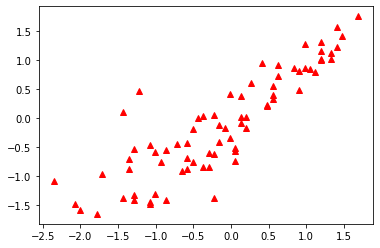

In [37]:
y_pred = lr.predict(X_test)
plt.plot(y_test,y_pred,'^',color='r')

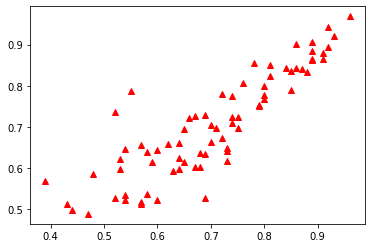

In [38]:
y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

plt.plot(y_test_orig,y_pred_orig,'^',color='r')

### **11. METRIICS IN LINEAR REGRESSION**

In [39]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.067 
MSE = 0.0044928686455320945 
MAE = 0.05023003165477124 
R2 = 0.7631840156233376 
Adjusted R2 = 0.7384420471063728
